# Seattle Weather Data Analysis - Exploratory Data Analysis

This notebook contains the exploratory data analysis of the Seattle weather dataset for building a weather prediction model.

## 1. Import Required Libraries

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


## 2. Load and Inspect Data

In [25]:
# Load the dataset
df = pd.read_csv('../seattle-weather.csv')

print("\nFirst few rows:")
print(df.head())


First few rows:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


### Display basic information about the dataset

In [26]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


### Basic statistics

In [27]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


### Check for missing values

In [28]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


### Display unique weather conditions and their counts

In [29]:
print("\nWeather Conditions Distribution:")
print(df['weather'].value_counts())


Weather Conditions Distribution:
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


## 3. Temporal Analysis
Let's analyze how weather patterns change over time

### Monthly weather patterns

<Figure size 1500x500 with 0 Axes>

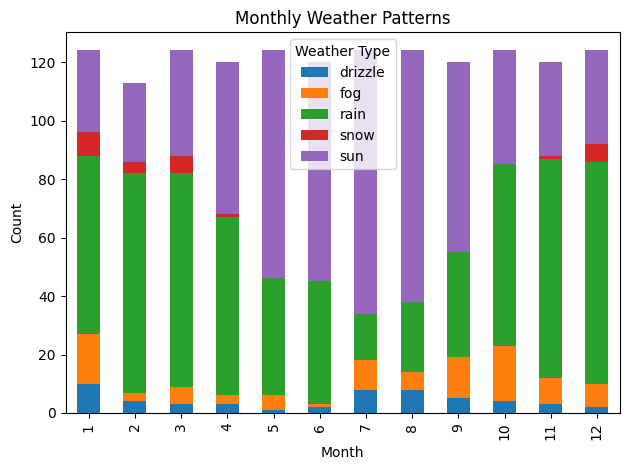

In [30]:
# Add time-based features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = pd.cut(df['date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Monthly weather patterns
plt.figure(figsize=(15, 5))
monthly_weather = pd.crosstab(df['month'], df['weather'])
monthly_weather.plot(kind='bar', stacked=True)
plt.title('Monthly Weather Patterns')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Weather Type')
plt.tight_layout()
plt.show()

### Temperature trends over time

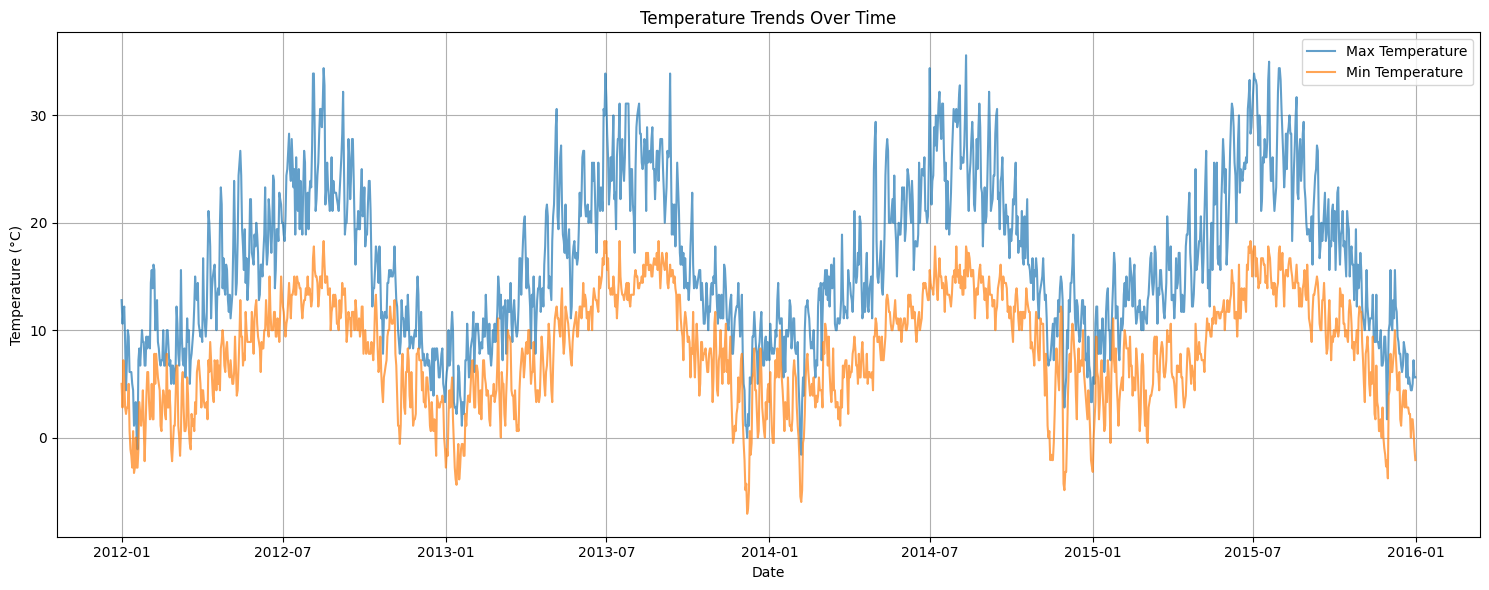

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temperature', alpha=0.7)
plt.plot(df['date'], df['temp_min'], label='Min Temperature', alpha=0.7)
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Weather Distribution Analysis
Let's analyze the distribution of different weather conditions and their relationships with other variables

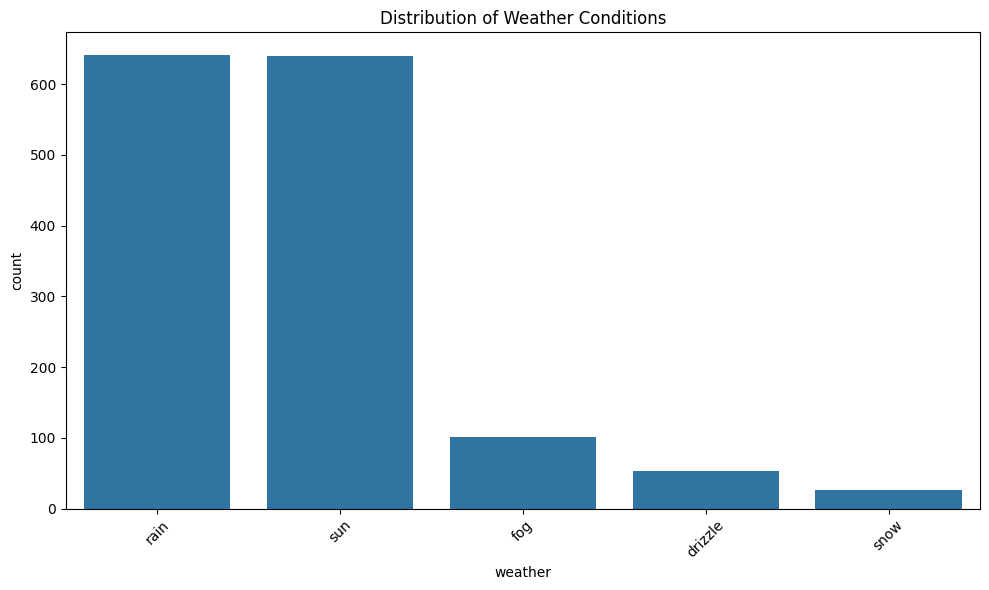

In [32]:
# Weather conditions distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index)
plt.title('Distribution of Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Box plots for temperature by weather condition

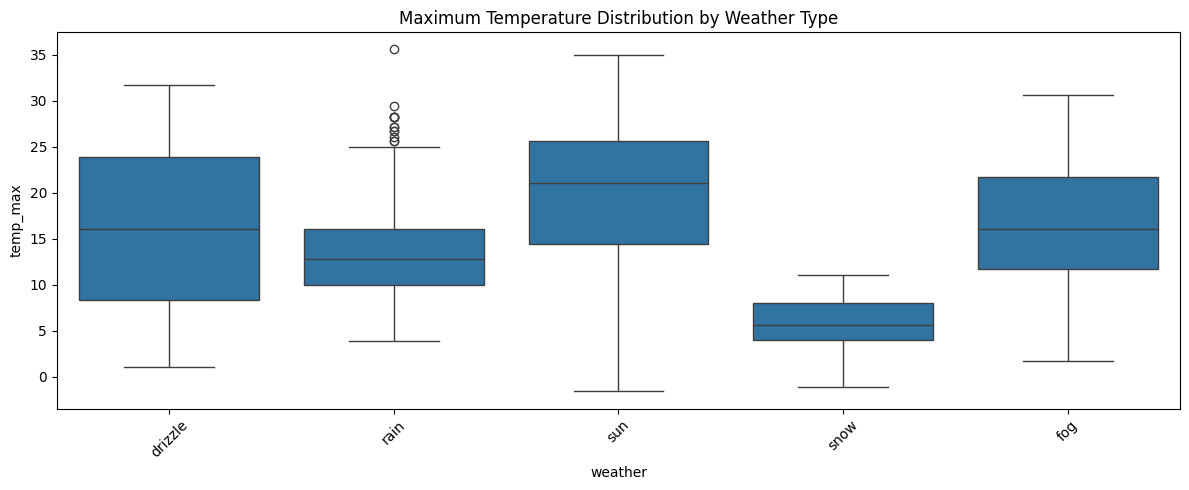

In [33]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='weather', y='temp_max')
plt.title('Maximum Temperature Distribution by Weather Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Create a violin plot for precipitation by weather

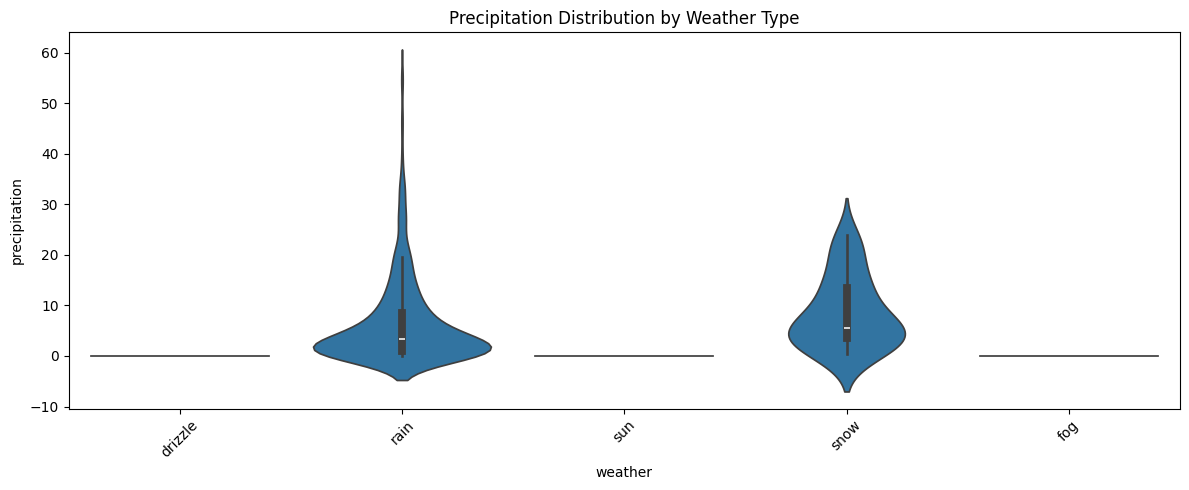

In [34]:
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x='weather', y='precipitation')
plt.title('Precipitation Distribution by Weather Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Wind speed distribution by weather type

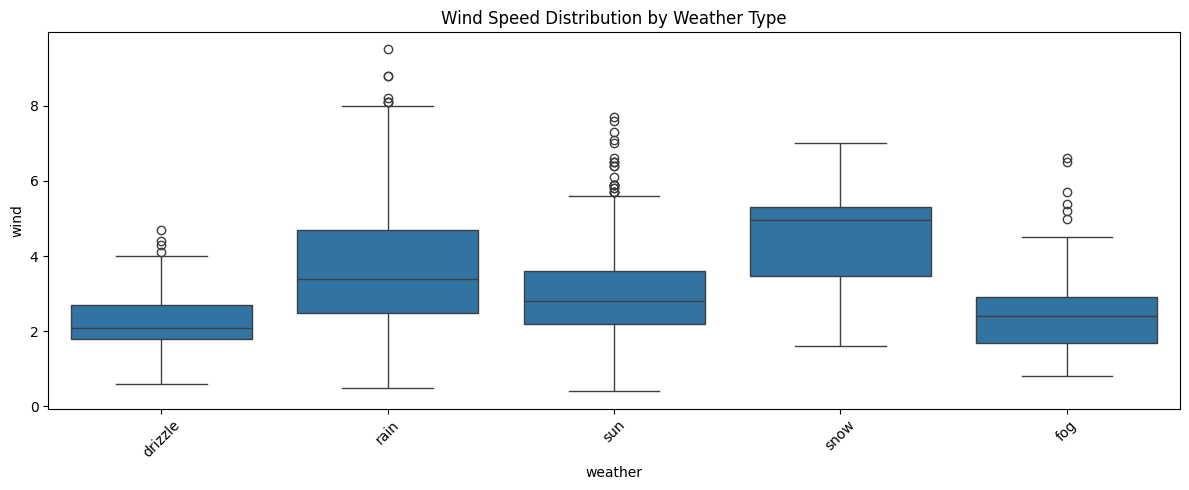

In [35]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='weather', y='wind')
plt.title('Wind Speed Distribution by Weather Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Correlation Analysis
Let's examine the relationships between different weather variables

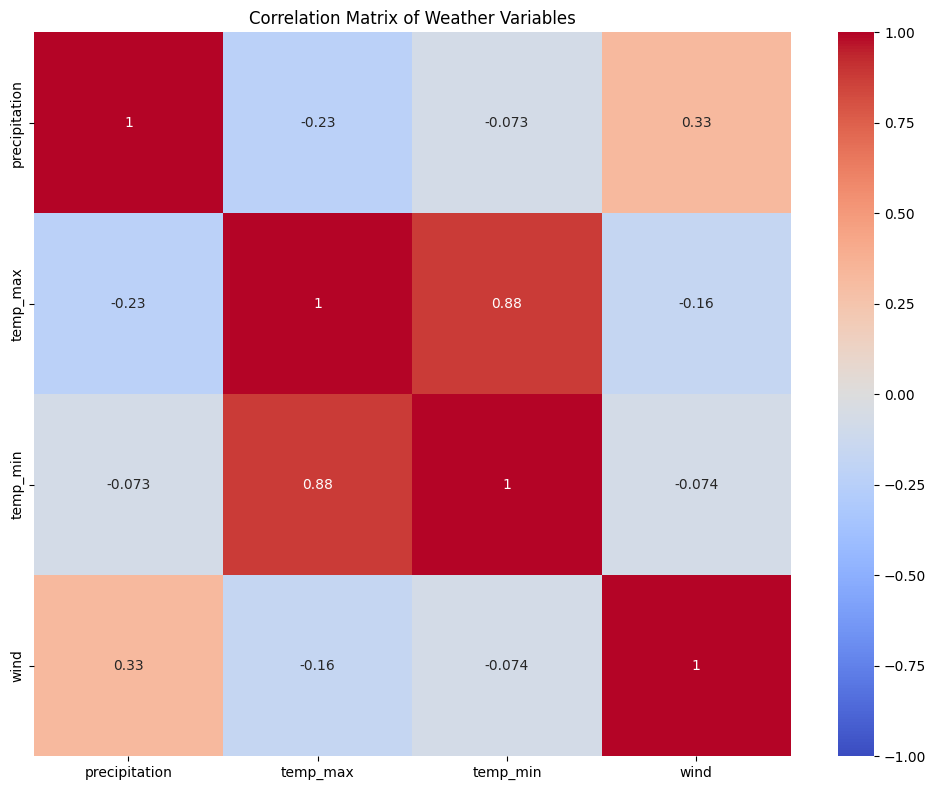

In [36]:
# Calculate correlation matrix for numerical variables
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Weather Variables')
plt.tight_layout()
plt.show()

### Create scatter plots with regression lines

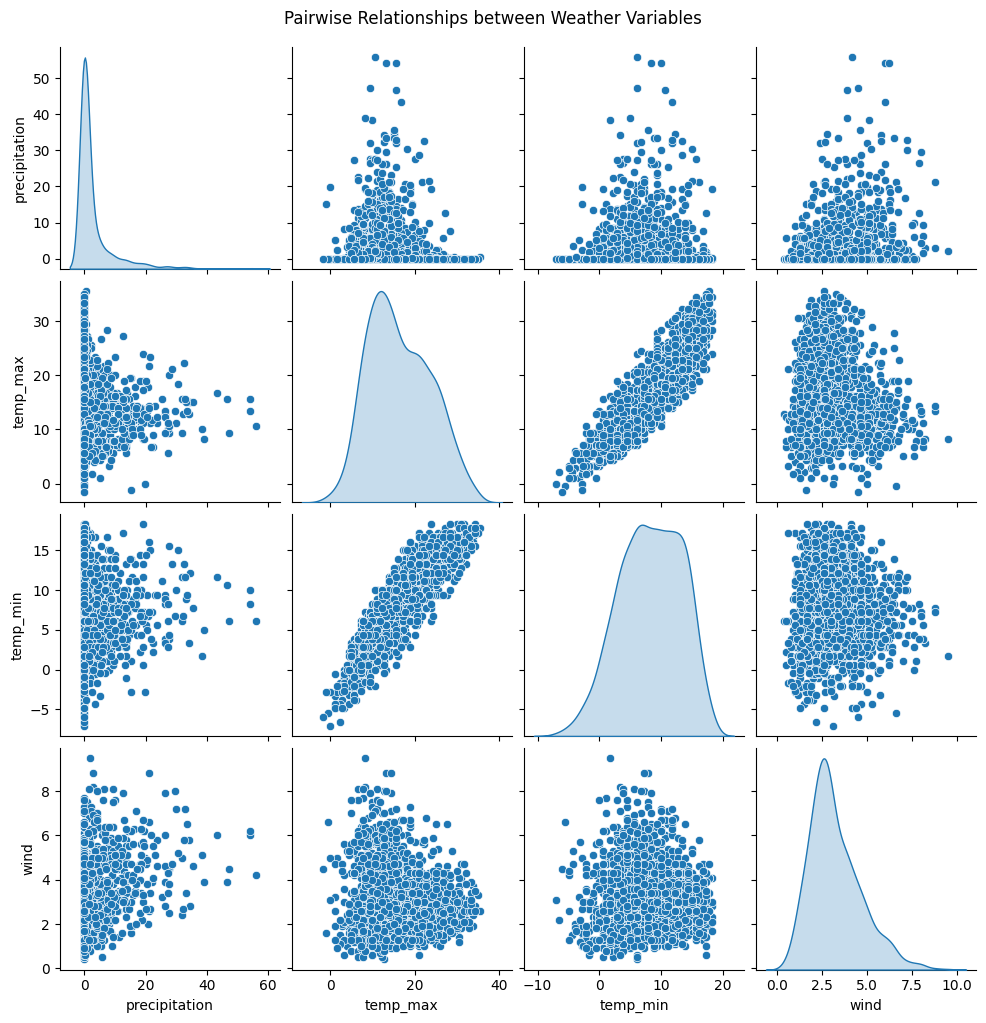

In [37]:
g = sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Weather Variables', y=1.02)
plt.show()

### Relationship between temperature and precipitation with weather types

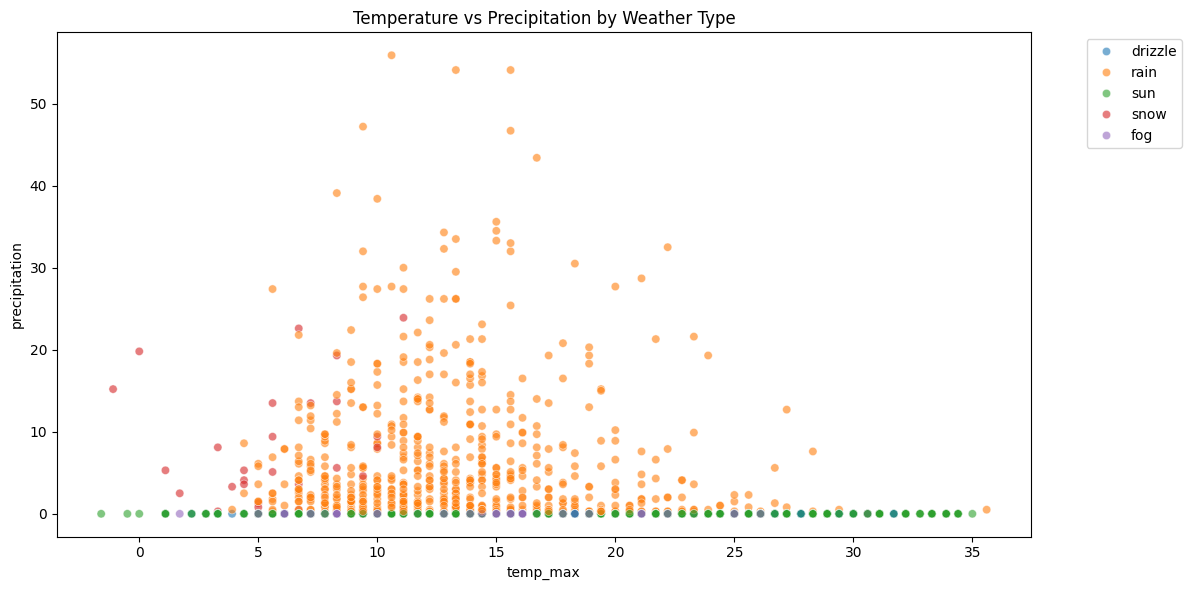

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temp_max', y='precipitation', hue='weather', alpha=0.6)
plt.title('Temperature vs Precipitation by Weather Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 6. Seasonal Analysis
Let's analyze how weather patterns change across seasons

<Figure size 1200x600 with 0 Axes>

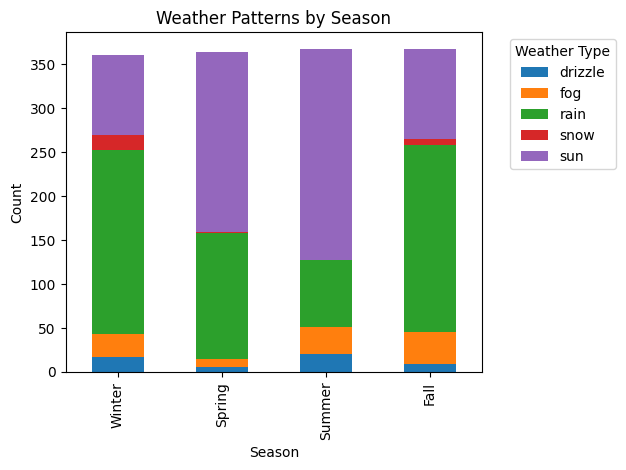

In [39]:
# Seasonal weather patterns
plt.figure(figsize=(12, 6))
seasonal_weather = pd.crosstab(df['season'], df['weather'])
seasonal_weather.plot(kind='bar', stacked=True)
plt.title('Weather Patterns by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Weather Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Seasonal temperature variations

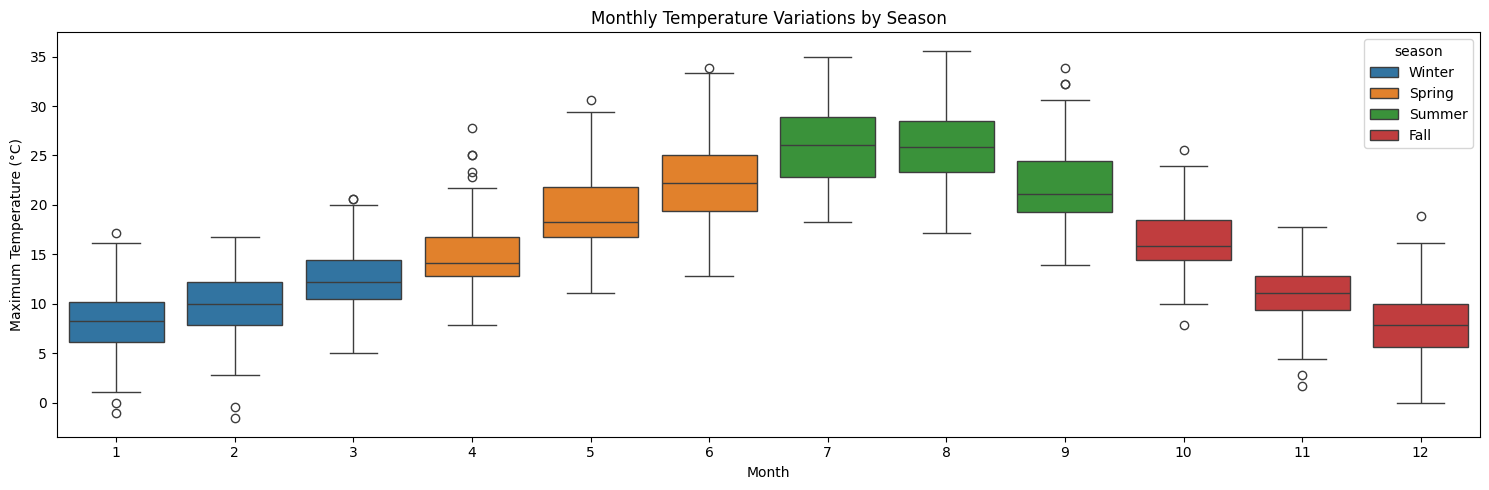

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='month', y='temp_max', hue='season')
plt.title('Monthly Temperature Variations by Season')
plt.xlabel('Month')
plt.ylabel('Maximum Temperature (°C)')
plt.tight_layout()
plt.show()

### Seasonal precipitation patterns

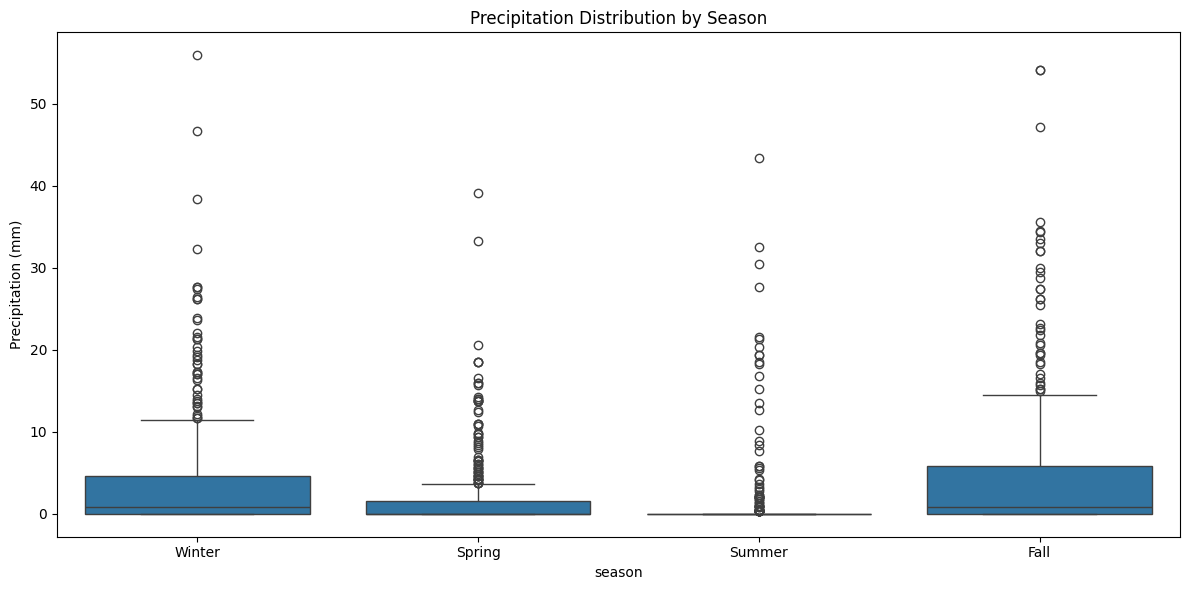

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='season', y='precipitation')
plt.title('Precipitation Distribution by Season')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()

### Create monthly averages

In [42]:
monthly_avg = df.groupby('month').agg({
    'temp_max': 'mean',
    'temp_min': 'mean',
    'precipitation': 'mean',
    'wind': 'mean'
}).round(2)

print("\nMonthly Averages:")
print(monthly_avg)


Monthly Averages:
       temp_max  temp_min  precipitation  wind
month                                         
1          8.23      2.70           3.76  3.14
2          9.86      4.05           3.73  3.79
3         12.39      4.86           4.89  3.58
4         15.02      6.36           3.13  3.52
5         19.30      9.61           1.67  3.12
6         22.40     12.24           1.11  3.13
7         26.00     14.20           0.39  2.91
8         26.11     14.77           1.32  2.75
9         21.92     12.36           1.96  2.96
10        16.39      9.35           4.06  2.94
11        11.02      4.70           5.35  3.48
12         8.19      3.32           5.02  3.62


## 7. Summary Statistics and Key Findings
Let's summarize our key findings from the analysis

### Print summary statistics

In [47]:
# Calculate summary statistics
summary_stats = {
    'Total Days': len(df),
    'Date Range': f"{df['date'].min().date()} to {df['date'].max().date()}",
    'Most Common Weather': df['weather'].mode()[0],
    'Avg Max Temp': f"{df['temp_max'].mean():.1f}°C",
    'Avg Min Temp': f"{df['temp_min'].mean():.1f}°C",
    'Avg Precipitation': f"{df['precipitation'].mean():.1f}mm",
    'Avg Wind Speed': f"{df['wind'].mean():.1f}m/s",
    'Rainy Days': len(df[df['weather'].isin(['rain', 'drizzle'])]),
    'Sunny Days': len(df[df['weather'] == 'sun']),
    'Snow Days': len(df[df['weather'] == 'snow'])
}

print("Summary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

Summary Statistics:
Total Days: 1461
Date Range: 2012-01-01 to 2015-12-31
Most Common Weather: rain
Avg Max Temp: 16.4°C
Avg Min Temp: 8.2°C
Avg Precipitation: 3.0mm
Avg Wind Speed: 3.2m/s
Rainy Days: 694
Sunny Days: 640
Snow Days: 26


### Calculate weather type percentages

In [45]:
weather_percentages = df['weather'].value_counts(normalize=True) * 100

print("\nWeather Type Distribution (%):")
for weather, percentage in weather_percentages.items():
    print(f"{weather}: {percentage:.1f}%")


Weather Type Distribution (%):
rain: 43.9%
sun: 43.8%
fog: 6.9%
drizzle: 3.6%
snow: 1.8%


### Create a pie chart of weather distribution

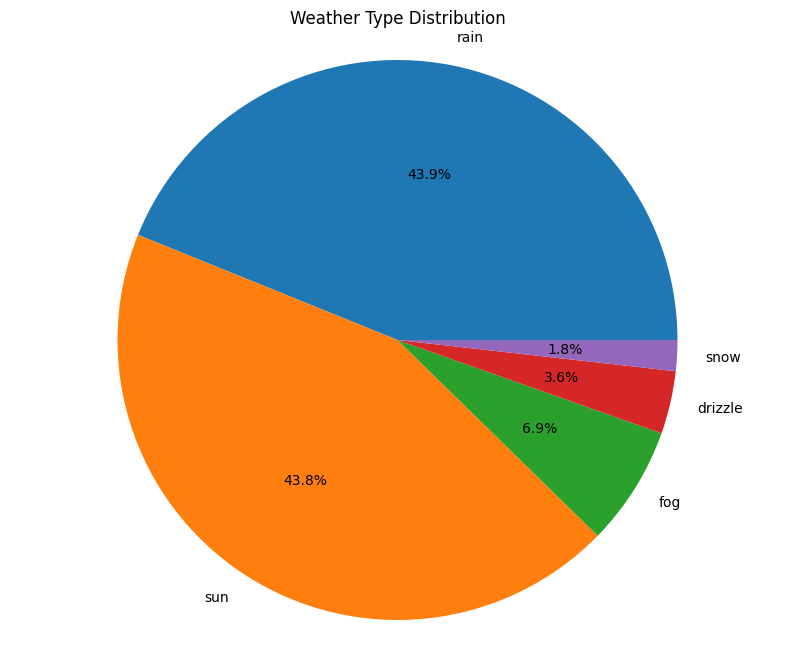

In [46]:
plt.figure(figsize=(10, 8))
plt.pie(weather_percentages, labels=weather_percentages.index, autopct='%1.1f%%')
plt.title('Weather Type Distribution')
plt.axis('equal')
plt.show()